## CONTENT LIST
Import Libraries

Import dataframes

Security Implications

Compare customer behavior in different geographic area

Create Exclusion Flag for Low-Activity Customers

Create 'Parent Status' Column

Create 'Income Level' Column

Create 'Pet Order Flag' Column then 'Pet Owner' Column

Create 'Baby Order Flag' Column then 'Baby Household' Column

Customer Profiles & their Comparison to Regions

Visualization - 'Parent Status' Distribution & Regional Distribution

Visualization - 'Income Level' Distribution & Regional Distribution

Visualization - 'Baby Household' Distribution & Regional Distribution

Aggregate max, mean, & min variables on Customer Profiles

Link between Customer Profiles & Departments?

Visualizations for Customer Profiles by Department

## 01. Import libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path=r'/Users/marieanek2/Documents/Instacart Basket Analysis'

In [3]:
df=pd.read_pickle(os.path.join(path,path,'02 Data','Prepared Data','customers_merged.pkl'))

In [4]:
df.shape

(32642450, 24)

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,Status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


##  Create Cross tabs

In [6]:
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [7]:
#Copy crosstab to clipboard to then past in Excel

crosstab.to_clipboard()

In [8]:
#View crosstab
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20564,20452,18313,16697,16280,14589,14063,12928,11620,...,1155,1042,939,1144,1104,1046,891,1046,941,137
1.0,0,31695,29975,28328,27336,25705,25199,23087,21939,21213,...,2813,2739,2615,2616,2651,2447,2550,2640,2371,321
2.0,0,46495,46304,44283,41040,41167,38337,37709,35950,34022,...,3568,3329,3606,3328,3082,2997,3065,3101,2621,329
3.0,0,61706,63455,60413,58257,56476,53169,49547,48530,48042,...,3246,2806,3089,2913,2652,2671,2475,2174,2474,223
4.0,0,76800,78925,74048,70983,66958,62753,61483,59803,57966,...,2266,2500,2044,1809,2089,1926,1800,1704,1820,153
5.0,0,89107,91834,87053,82372,78063,73985,70373,64827,63476,...,1638,1375,992,1223,1230,1177,971,915,937,81
6.0,0,120796,123015,115425,107430,101355,96488,90223,87658,79047,...,848,949,1014,842,578,496,607,488,550,44
7.0,0,184990,181840,168761,158484,144546,138519,129194,121417,115396,...,576,525,443,602,424,424,379,424,327,35
8.0,0,112461,110854,102971,95624,88251,82164,79189,71450,67963,...,265,229,246,276,232,238,144,138,85,13


# 03. Security Implications

Customer's first & last name are PII & were removed earlier because of potential privacy issue (especially with household income being included in the data)

# 04. Compare customer behavior in different geographic areas

In [9]:
#View all States in 'State' column

df['STATE'].value_counts(dropna= False)

Pennsylvania            671793
California              664517
Rhode Island            661727
Georgia                 661161
New Mexico              659236
Arizona                 658638
North Carolina          656400
Oklahoma                656339
Alaska                  653094
Minnesota               652493
Massachusetts           651083
Wyoming                 648998
Virginia                646157
Missouri                645395
Texas                   645132
Colorado                643877
Maine                   643228
North Dakota            643056
Alabama                 642732
Louisiana               642246
Kansas                  642096
Delaware                641546
South Carolina          641480
Oregon                  641026
Arkansas                640795
New York                640770
Nevada                  640764
Montana                 639896
South Dakota            638419
Illinois                637555
Washington              637513
Hawaii                  637511
Mississi

In [10]:
#Create “Region” column based on “STATE” column using For-loop

result = []

for value in df ["STATE"]:
    if (value == "Maine" or value=="New Hampshire" or value=="Vermont" or value=="Massachusetts" or value=="Rhode Island" or value=="Connecticut" or value=="New York" or value=="Pennsylvania" or value=="New Jersey"):
        result.append("Northeast")
    elif (value == "Wisconsin" or value=="Michigan" or value=="Illinois" or value=="Indiana" or value=="Ohio" or value=="North Dakota" or value=="South Dakota" or value=="Nebraska" or value=="Kansas" or value=="Minnesota" or value=="Iowa" or value=="Missouri"):
        result.append("Midwest")
    elif (value == "Delaware" or value== "Maryland" or value== "District of Columbia" or value== "Virginia" or value== "West Virginia" or value== "North Carolina" or value== "South Carolina" or value== "Georgia" or value== "Florida" or value== "Kentucky" or value== "Tennessee" or value== "Mississippi" or value== "Alabama" or value== "Oklahoma" or value== "Texas" or value== "Arkansas" or value== "Louisiana"):
        result.append("South")
    elif (value == "Idaho" or value== "Montana" or value== "Wyoming" or value== "Nevada" or value== "Utah" or value== "Colorado" or value== "Arizona" or value== "New Mexico" or value== "Alaska" or value== "Washington" or value== "Oregon" or value== "California" or value== "Hawaii"):
        result.append("West")
    else:
        result.append("Not Enough Data")

In [11]:
#Viewing result
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

In [12]:
#Create 'Country_Region' column in df using result

df['Country_Region'] = result

In [13]:
#Print frequency of this new column

df['Country_Region'].value_counts(dropna=False)

South        10871134
West          8353486
Midwest       7652795
Northeast     5765035
Name: Country_Region, dtype: int64

In [14]:
#Difference in spending habits b/w regions? - Crossing Region variable w/ Spending Flag

crosstab = pd.crosstab(df['Country_Region'], df['Age'], dropna = False)

In [15]:
#Copy crosstab to clipboard to then past in Excel

crosstab.to_clipboard()

In [16]:
#View crosstab
crosstab

Age,18,19,20,21,22,23,24,25,26,27,...,72,73,74,75,76,77,78,79,80,81
Country_Region,,,,,,,,,,,,,,,,,,,,,
Midwest,109895,118489,129384,114169,135313,116252,110136,112714,111703,136562,...,109008,126287,107342,118839,121394,115068,111223,122915,114376,131472
Northeast,85103,100368,82037,91881,90945,99461,85232,81303,88416,94403,...,94065,88587,86610,100447,84951,97340,89194,95662,95660,84634
South,173135,173470,173915,186000,163751,177830,179022,159733,183824,167644,...,165761,173751,174655,165558,170462,165989,171040,197421,167316,159867
West,135967,131228,121235,124183,127656,124789,138251,122128,132669,129507,...,137495,135965,133672,139034,125205,127514,127500,117561,141519,137120


In [17]:
#Regional statistics - Regional Prices

df.groupby(['Country_Region']).agg({'prices':['median']})

,prices
,median
Country_Region,
Midwest,7.4
Northeast,7.4
South,7.4
West,7.4


No significant differences in the median prices from all the regions

In [18]:
df.groupby(['Country_Region']).agg({'prices':['sum']})

,prices
,sum
Country_Region,
Midwest,5.927742e+07
Northeast,4.460296e+07
South,8.423400e+07
West,6.469317e+07


Customers in the south make up the highest percentage of prices paid, followed by Midwest, West and finally Northeast

In [19]:
df.groupby(['Country_Region']).agg({'order_number':['sum']})

,order_number
,sum
Country_Region,
Midwest,129501239
Northeast,99225517
South,186403844
West,144308406


Again, the South has the highest number of total orders followed by the West,Midwest and Northeast respectively.

In [20]:
df.groupby(['Country_Region']).agg({'order_hour_of_day':['median']})

,order_hour_of_day
,median
Country_Region,
Midwest,13
Northeast,13
South,13
West,13


Theres no difference in orders placed at the median hour 

# 05. Create an exclusion flag for low-activity customers (less than 5 orders)

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
#Create 'If' statement using loc() function

df.loc[df['order_number'] <5,'Activity_Flag'] = 'Low_Activity'

In [22]:
df.loc[df['order_number'] >= 5,'Activity_Flag'] = 'High_Activity'

In [23]:
#Print frequency of new 'Activity_Flag' column

df['Activity_Flag'].value_counts(dropna=False)

High_Activity    24620531
Low_Activity      8021919
Name: Activity_Flag, dtype: int64

In [24]:
#Create sample df of only low_activty customers

df_low_activity = df[df.Activity_Flag == 'Low_Activity']

In [25]:
#Check sample df
df_low_activity.shape

(8021919, 26)

In [26]:
#Export df_low_activity 

df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_low_activity_4_10_part1.pkl'))

In [27]:
#Update current df to exclude 'Low_Activity' customers

df = df[df.Activity_Flag == 'High_Activity']

In [28]:
#Check main df
df.shape

(24620531, 26)

In [29]:
#check values
df['Activity_Flag'].value_counts(dropna= False)

High_Activity    24620531
Name: Activity_Flag, dtype: int64

In [30]:
#Export df for saving progress

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'high_activity_only_task_4_10.pkl'))

# 06. Create profiling variables

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [31]:
#Create a parent status column
df ['Parent_Status']=""

In [32]:
df.loc[((df['Age'] >= 18) & (df['Age'] <= 35) & (df['n_dependants'] >= 1)), 'Parent_Status'] = 'Young Parent'

In [33]:
df.loc[(df ['n_dependants'] == 0), 'Parent_Status'] = 'No Dependants'

In [34]:
df.loc[(df['Age'] >= 35) & (df['Age'] <= 60) & (df['n_dependants'] >= 1), 'Parent_Status'] = 'Middle Age Parent'

In [35]:
df.loc[(df['Age'] >= 60) & (df['n_dependants'] >= 1), 'Parent_Status'] = 'Older Age Parent'

In [36]:
#View column counts
df['Parent_Status'].value_counts(dropna= False)

Middle Age Parent    7250560
Older Age Parent     6294004
No Dependants        6156744
Young Parent         4919223
Name: Parent_Status, dtype: int64

# 07. Create 'Income Level' Column

In [37]:
#Create 'Income' column

df ['Income Level']=""

In [38]:
df.loc[(df['income'] < 40100), 'Income Level'] = 'Lower Income'

In [39]:
df.loc[(df['income'] >= 40100) & (df['income'] <= 120400), 'Income Level'] = 'Middle Income'

In [40]:
df.loc[(df['income'] > 120400), 'Income Level'] = 'Higher Income'

In [41]:
df['Income Level'].value_counts(dropna= False)

Middle Income    16110259
Higher Income     7243785
Lower Income      1266487
Name: Income Level, dtype: int64

In [42]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,n_dependants,Status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level
21,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income
22,431534,1,prior,5,4,15,28.0,12427.0,2.0,1.0,...,31,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income
23,431534,1,prior,5,4,15,28.0,10258.0,3.0,1.0,...,31,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income
24,431534,1,prior,5,4,15,28.0,25133.0,4.0,1.0,...,31,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income
25,431534,1,prior,5,4,15,28.0,10326.0,5.0,0.0,...,31,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income


In [43]:
#Export df for saving progress purposes

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'parent_income_profiles.pkl'))

# 08. Create 'Pet Order Flag' Column then 'Pet Owner' Column

In [44]:
#Create pet order flag column

df ['Pet Order Flag']=""

In [45]:
df.loc[(df['department_id'] == 8), 'Pet Order Flag'] = 1

In [46]:
df.loc[(df['department_id'] != 8), 'Pet Order Flag'] = 0

In [47]:
df['Pet Order Flag'].value_counts(dropna= False)

0    24548416
1       72115
Name: Pet Order Flag, dtype: int64

In [48]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,Status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag
21,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0
22,431534,1,prior,5,4,15,28.0,12427.0,2.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0
23,431534,1,prior,5,4,15,28.0,10258.0,3.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0
24,431534,1,prior,5,4,15,28.0,25133.0,4.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0
25,431534,1,prior,5,4,15,28.0,10326.0,5.0,0.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0


In [49]:
#Export df with Pet Order Flag column

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'pet_order_flag.pkl'))

## Create Pet Owner Column

In [50]:
# Group by user_id, sum by total num of orders in dept 8 per user_id (Pet Order Flag)

df_grouped = df.groupby('user_id').agg({'Pet Order Flag':'sum'})

In [51]:
# Create Pet Owner column 

df_grouped['Pet Owner'] =""

In [52]:

df_grouped.loc[(df_grouped['Pet Order Flag'] >= 1), 'Pet Owner'] = "Pet Owner"

In [53]:
# If user has no orders in dept 8

df_grouped.loc[(df_grouped['Pet Order Flag'] == 0), 'Pet Owner'] = "Not Pet Owner"

In [54]:
# Drop Pet Order Flag column

df_grouped = df_grouped.drop(columns = ['Pet Order Flag'])

In [55]:
df_grouped.shape

(182223, 1)

In [56]:
df_grouped.head()

,Pet Owner
user_id,
1,Not Pet Owner
2,Not Pet Owner
3,Not Pet Owner
4,Not Pet Owner
5,Not Pet Owner


In [57]:
#Export grouped Pet Order Flag df

df_grouped.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'grouped_pet_order_flag.pkl'))

## Merge original df with Pet Owner df

In [58]:
# Left join df  with df_grouped (right) to get "Pet Order" for each user_id

df = df.merge(df_grouped, on='user_id', how='left')

In [59]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,n_dependants,Status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag,Pet Owner
0,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
1,431534,1,prior,5,4,15,28.0,12427.0,2.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
2,431534,1,prior,5,4,15,28.0,10258.0,3.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
3,431534,1,prior,5,4,15,28.0,25133.0,4.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
4,431534,1,prior,5,4,15,28.0,10326.0,5.0,0.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner


In [60]:
df = df.drop(columns =['Pet Order Flag'])

In [61]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,Status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner
0,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
1,431534,1,prior,5,4,15,28.0,12427.0,2.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
2,431534,1,prior,5,4,15,28.0,10258.0,3.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
3,431534,1,prior,5,4,15,28.0,25133.0,4.0,1.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
4,431534,1,prior,5,4,15,28.0,10326.0,5.0,0.0,...,2/17/2019,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner


In [62]:
#Export df with Pet Owner column

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'pet_owner_column_created.pkl'))

# 09. Create 'Baby Order Flag' Column then 'Baby Household' Column

## Create Baby Order Flag Column

In [63]:
#Create baby order column

df['Baby Order Flag']=""

In [64]:
df.loc[(df['department_id'] == 18), 'Baby Order Flag'] = 1
df.loc[(df['department_id'] != 18), 'Baby Order Flag'] = 0

In [65]:
#Print value counts for new column

df['Baby Order Flag'].value_counts(dropna= False)

0    24284584
1      335947
Name: Baby Order Flag, dtype: int64

In [66]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,n_dependants,Status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag
0,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
1,431534,1,prior,5,4,15,28.0,12427.0,2.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
2,431534,1,prior,5,4,15,28.0,10258.0,3.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
3,431534,1,prior,5,4,15,28.0,25133.0,4.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
4,431534,1,prior,5,4,15,28.0,10326.0,5.0,0.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0


In [67]:
# Group by user_id, sum by total num of orders in dept 18 per user_id (Baby Order Flag)

df_baby = df.groupby('user_id').agg({'Baby Order Flag':'sum'})

In [68]:
# Create Baby Household column 

df_baby['Baby Household'] =""

In [69]:
# If Baby Order >= 1 then "Baby Household" (user had 1 or more orders in dept 18)

df_baby.loc[(df_baby['Baby Order Flag'] >= 1), 'Baby Household'] = "Baby Household"

In [70]:
# If Baby Order = 0 then "Baby Household" (user had no orders in dept 18)

df_baby.loc[(df_baby['Baby Order Flag'] == 0), 'Baby Household'] = "Non-Baby Household"

In [71]:
df_baby.head()

,Baby Order Flag,Baby Household
user_id,,
1,0,Non-Baby Household
2,0,Non-Baby Household
3,0,Non-Baby Household
4,0,Non-Baby Household
5,0,Non-Baby Household


In [72]:
# Left join df_2 (left) with df_baby (right) to get "Baby Household" for each user_id

df= df.merge(df_baby, on='user_id', how='left')

In [73]:
df['Baby Household'].value_counts(dropna= False)

Non-Baby Household    16766574
Baby Household         7853957
Name: Baby Household, dtype: int64

In [74]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag_x,Baby Order Flag_y,Baby Household
0,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
1,431534,1,prior,5,4,15,28.0,12427.0,2.0,1.0,...,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
2,431534,1,prior,5,4,15,28.0,10258.0,3.0,1.0,...,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
3,431534,1,prior,5,4,15,28.0,25133.0,4.0,1.0,...,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
4,431534,1,prior,5,4,15,28.0,10326.0,5.0,0.0,...,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household


In [75]:
#Drop Baby Order Flag columns

df= df.drop(columns = ['Baby Order Flag_x','Baby Order Flag_y'])

In [76]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,n_dependants,Status,income,_merge,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Household
0,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,431534,1,prior,5,4,15,28.0,12427.0,2.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,431534,1,prior,5,4,15,28.0,10258.0,3.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,431534,1,prior,5,4,15,28.0,25133.0,4.0,1.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
4,431534,1,prior,5,4,15,28.0,10326.0,5.0,0.0,...,3,married,40423,both,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household


# 10. Customer Profiles & their Comparison to Region

## Create Customer Profile df

In [77]:
#Create new df with only necessary columns

df_customer_profile = df[['user_id', 'Country_Region', 'department_id', 'Status', 'Income Level', 'Pet Owner', 'Baby Household']]

In [78]:
df_customer_profile.head()

,user_id,Country_Region,department_id,Status,Income Level,Pet Owner,Baby Household
0,1,South,7.0,married,Middle Income,Not Pet Owner,Non-Baby Household
1,1,South,19.0,married,Middle Income,Not Pet Owner,Non-Baby Household
2,1,South,19.0,married,Middle Income,Not Pet Owner,Non-Baby Household
3,1,South,16.0,married,Middle Income,Not Pet Owner,Non-Baby Household
4,1,South,4.0,married,Middle Income,Not Pet Owner,Non-Baby Household


In [79]:
#Count of user_id in each region

df_region = df_customer_profile.groupby('Country_Region').agg({'user_id':['nunique']})

In [80]:
df_region

,user_id
,nunique
Country_Region,
Midwest,42935
Northeast,32124
South,60751
West,46413


### Group by Parent Status

In [95]:
df_parent = df_customer_profile.groupby('Status').agg({'user_id':['nunique']})

In [96]:
df_parent

,user_id
,nunique
Status,
divorced/widowed,15545
living with parents and siblings,8577
married,128065
single,30036


In [82]:
#Count of user_id in each Parent category

df_parent_region = df_customer_profile.groupby(['Status','Country_Region']).agg({'user_id':['nunique']})

In [83]:
df_parent_region

user_id
                                                nunique
Status                           Country_Region        
divorced/widowed                 Midwest           3608
                                 Northeast         2784
                                 South             5191
                                 West              3962
living with parents and siblings Midwest           2061
                                 Northeast         1381
                                 South             2938
                                 West              2197
married                          Midwest          30195
                                 Northeast        22603
                                 South            42640
                                 West             32627
single                           Midwest           7071
                                 Northeast         5356
                                 South             9982
                                 West              7627

### Group by Income Level

In [84]:
df_income = df_customer_profile.groupby('Income Level').agg({'user_id':['nunique']})

In [85]:
df_income

,user_id
,nunique
Income Level,
Higher Income,49907
Lower Income,14689
Middle Income,117627


### Group by Income Level & Region

In [86]:
df_income_region = df_customer_profile.groupby(['Income Level','Country_Region']).agg({'user_id':['nunique']})

In [87]:
df_income_region

user_id
                             nunique
Income Level  Country_Region        
Higher Income Midwest          11904
              Northeast         8851
              South            16495
              West             12657
Lower Income  Midwest           3412
              Northeast         2641
              South             4870
              West              3766
Middle Income Midwest          27619
              Northeast        20632
              South            39386
              West             29990

### Group by Pet Owner & Region

In [108]:
df_pet = df_customer_profile.groupby('Pet Owner').agg({'user_id':['nunique']})

In [109]:
df_pet

,user_id
,nunique
Pet Owner,
Not Pet Owner,171378
Pet Owner,10845


In [88]:
df_pet_region = df_customer_profile.groupby(['Pet Owner','Country_Region']).agg({'user_id':['nunique']})

In [89]:
df_pet_region

user_id
                             nunique
Pet Owner     Country_Region        
Not Pet Owner Midwest          40365
              Northeast        30245
              South            57201
              West             43567
Pet Owner     Midwest           2570
              Northeast         1879
              South             3550
              West              2846

### Group by Baby Household

In [90]:
df_baby = df_customer_profile.groupby('Baby Household').agg({'user_id':['nunique']})

In [91]:
df_baby

,user_id
,nunique
Baby Household,
Baby Household,25771
Non-Baby Household,156452


### Group by Baby Household and Region

In [92]:
df_baby_region = df_customer_profile.groupby(['Baby Household','Country_Region']).agg({'user_id':['nunique']})

In [93]:
df_baby_region

user_id
                                  nunique
Baby Household     Country_Region        
Baby Household     Midwest           6161
                   Northeast         4492
                   South             8612
                   West              6506
Non-Baby Household Midwest          36774
                   Northeast        27632
                   South            52139
                   West             39907

## 11. Visualization - 'Parent Status' Distribution & Regional Distribution

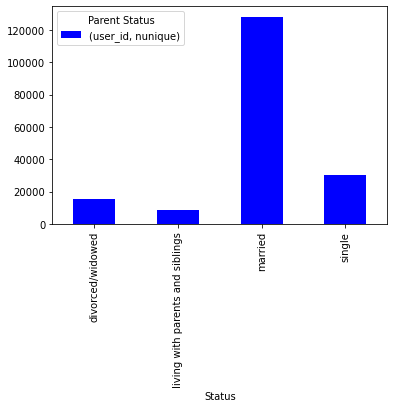

In [100]:
#Create Bar Chart for parent status

df_parent.plot.bar(color=['blue'])
plt.legend(title='Parent Status')

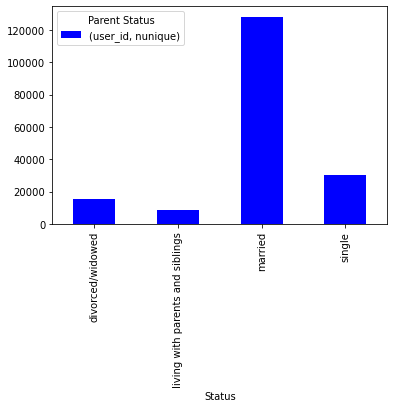

In [99]:
#Saving Bar Chart in jupyter memory

bar_parent_status = df_parent.plot.bar(color=['blue'])
plt.legend(title='Parent Status')

In [101]:
#Export chart outside of jupyter in form of image file
bar_parent_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_stask_4_10.png'))

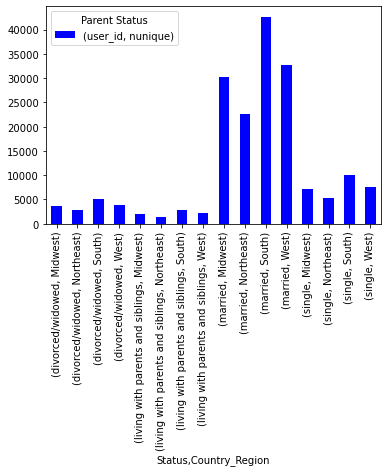

In [102]:
#Create Bar Chart for parent status & region

bar_parent_region = df_parent_region.plot.bar(color=['blue'])
plt.legend(title='Parent Status')

## 12. Visualization - 'Income Level' Distribution & Regional Distribution

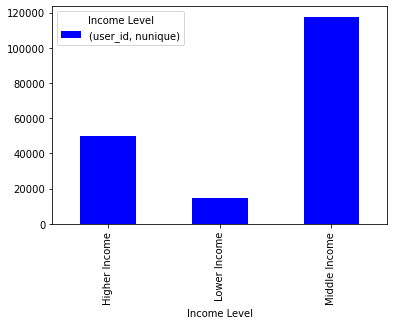

In [103]:
#Create Bar Chart for income status

bar_income = df_income.plot.bar(color=['blue'])
plt.legend(title='Income Level')

In [104]:
#Export Income Bar Chart

bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_4_10.png'))

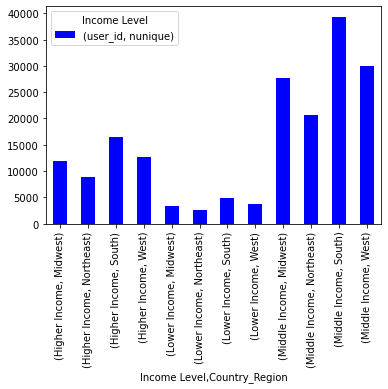

In [105]:
#Create Bar Chart for income status by region

bar_income_region = df_income_region.plot.bar(color=['blue'])
plt.legend(title='Income Level')

In [106]:
#Export Income & Region Bar Chart

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region_task_4_10.png'))

## 13. Visualization - 'Pet Owner' Distribution & Regional Distribution

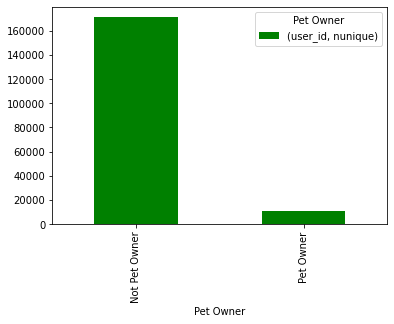

In [111]:
#Create Bar Chart for pet owner status

bar_pet = df_pet.plot.bar(color=['green'])
plt.legend(title='Pet Owner')

In [112]:
#Export Pet Bar chart

bar_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_owner.png'))

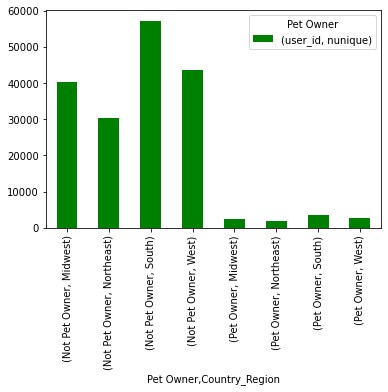

In [113]:
#Create Bar Chart for pet owner status & region

bar_pet_region = df_pet_region.plot.bar(color=['green'])
plt.legend(title='Pet Owner')

In [114]:
#Export Pet & Region Bar chart

bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_region.png'))

## 14. Visualization - 'Baby Household' Distribution & Regional Distribution

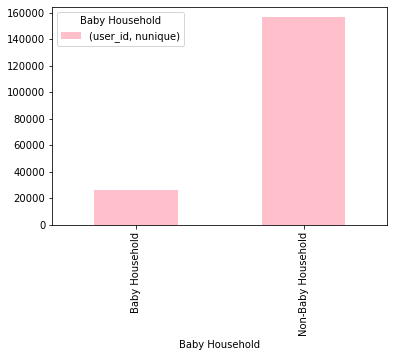

In [115]:
#Create baby household bar chart 

bar_baby = df_baby.plot.bar(color=['pink'])
plt.legend(title='Baby Household')

In [116]:
#Export baby household chart 

bar_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby_household.png'))

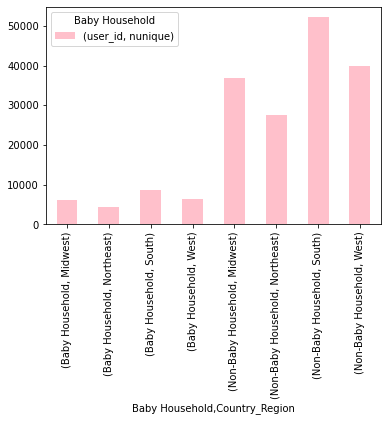

In [117]:
#Create Bar Chart for baby household & region

bar_baby_region = df_baby_region.plot.bar(color=['pink'])
plt.legend(title='Baby Household')

In [118]:
#Export baby household & region chart 

bar_baby_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby_household_region.png'))

## 15. Aggregate max, mean, & min variables on Customer Profiles

In [119]:
#Do certain Parent categories shop at different hours of the day?

df.groupby('Parent_Status').agg({'order_hour_of_day':['max','min','mean','median']})

order_hour_of_day                      
                                max min       mean median
Parent_Status                                            
Middle Age Parent                23   0  13.375966     13
No Dependants                    23   0  13.366545     13
Older Age Parent                 23   0  13.363557     13
Young Parent                     23   0  13.342505     13

Theres no correlation between the variables

In [123]:
#Do certain Parent categories shop on different days of the week?

df.groupby('Parent_Status').agg({'order_dow':['max','min','mean','median']})

order_dow                     
                        max min      mean median
Parent_Status                                   
Middle Age Parent         6   0  2.751223      3
No Dependants             6   0  2.741866      3
Older Age Parent          6   0  2.753547      3
Young Parent              6   0  2.744335      3

No correlation here between variables either.

In [125]:
#Do certain ages tend to be pet owners?

df.groupby('Pet Owner').agg({'Age':['mean','median','min', 'max']})

Age               
                    mean median min max
Pet Owner                              
Not Pet Owner  49.427467     49  18  81
Pet Owner      49.706757     50  18  81

Still no correlation beteween these variables

In [127]:
#Do females or males tend to place orders fewer days apart? 

df.groupby('Gender').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                         mean median  min   max
Gender                                         
Female              10.111597    7.0  0.0  30.0
Male                10.153885    7.0  0.0  30.0

Females do shop a bit more than the men do.

In [128]:
#Do females or males tend to place orders at certain times of day? 

df.groupby('Gender').agg({'order_hour_of_day':['mean','median','min', 'max']})

order_hour_of_day               
                    mean median min max
Gender                                 
Female         13.362587     13   0  23
Male           13.364903     13   0  23

No significant corellation

In [130]:
#Do pet owners tend to have higher incomes?

df.groupby('Pet Owner').agg({'income':['mean','median','min', 'max']})

income                      
                        mean median    min     max
Pet Owner                                         
Not Pet Owner   99214.897725  96495  25903  593901
Pet Owner      105199.800325  99645  26256  591089

Yes Pet owners tend to have higher incomes

In [131]:
#Do those with higher income levels order more frequently? 

df.groupby('Income Level').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                mean median  min   max
Income Level                                          
Higher Income              10.080201    7.0  0.0  30.0
Lower Income               10.554389    7.0  0.0  30.0
Middle Income              10.123430    7.0  0.0  30.0

Yes, higher income earners shop a little more often than the lower income

In [132]:
#Do households with babies place orders fewer days apart?

df.groupby('Baby Household').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                     mean median  min   max
Baby Household                                             
Baby Household                   8.686956    7.0  0.0  30.0
Non-Baby Household              10.810193    8.0  0.0  30.0

Yes, baby households tend to place orders more frequently (fewer days apart) than non-baby households

## 16. Link between Customer Profiles & Departments


## Parent Status

In [133]:
#Parent Status by Department

crosstab_parent_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Status'], dropna=False )
crosstab_parent_department 

Status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1.0,141707,79566,1143450,264121
2.0,2267,1460,18771,4668
3.0,75831,42727,621487,146653
4.0,619577,343702,5070504,1193308
5.0,8952,6284,73740,19026
6.0,16965,9659,138203,33073
7.0,175453,94325,1430083,336605
8.0,6262,4190,49675,11988
9.0,54174,30606,445705,103240


In [134]:
crosstab_parent_department.to_clipboard()

Produce & Dairy/eggs are by far the most popular departments for each age group.

Also, all categories (including No Dependants) purchase items from the Baby department. could be presents ,maybe ?

## Income Level

In [135]:
#Income Level by Department

crosstab_income_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Income Level'], dropna=False )
crosstab_income_department 

Income Level,Higher Income,Lower Income,Middle Income
department_id,,,
1.0,491199,76534,1061111
2.0,8111,1544,17511
3.0,269656,38497,578545
4.0,2150982,296229,4779880
5.0,35473,6060,66469
6.0,59328,7554,131018
7.0,574987,150702,1310777
8.0,23225,3364,45526
9.0,194212,21542,417971


In [136]:
crosstab_income_department.to_clipboard()

Pet owners smallest percentage is in Department 10 (bulk)

Non-pet owners smallest percentage is Department 5 (alcohol) & Department 17 (household)

## Baby Households

In [137]:
#Baby Household by Department

crosstab_baby_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Baby Household'], dropna=False )
crosstab_baby_department 

Baby Household,Baby Household,Non-Baby Household
department_id,,
1.0,530968,1097876
2.0,8964,18202
3.0,290579,596119
4.0,2249054,4978037
5.0,15907,92095
6.0,59661,138239
7.0,516213,1520253
8.0,18242,53873
9.0,229047,404678


In [138]:
crosstab_baby_department.to_clipboard()

Baby households consistently make up averagely 32% of all departments while making up 100% of department 18 (baby).

Observations;

Baby households smallest percentage is in Department 5 (alcohol) at a very low 15% which in turn makes Non-baby households largest percentage be at 85% for Department 5 (alcohol).

## 17.Visualizations for customer Profiles by Department 

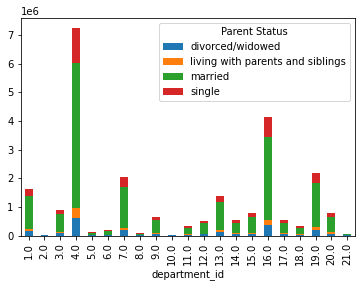

In [139]:
#Parent Status & Department Stacked Bar

parent_department_stacked_bar = crosstab_parent_department.plot.bar(stacked= True)
plt.legend(title='Parent Status')

In [140]:
#Export bar chart 

parent_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_department_stacked_bar.png'))

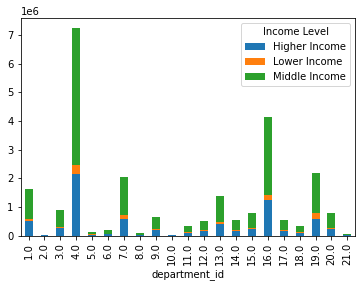

In [141]:
#Income Level & Department Stacked Bar

income_department_stacked_bar = crosstab_income_department.plot.bar(stacked= True)
plt.legend(title='Income Level')

In [142]:
#Export bar chart 

income_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_department_stacked_bar.png'))

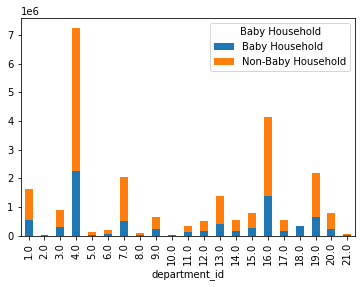

In [144]:
#Baby Household & Department Stacked Bar

baby_department_stacked_bar = crosstab_baby_department.plot.bar(stacked= True)
plt.legend(title='Baby Household')

In [146]:
#Export bar chart 

baby_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'baby_department_stacked_bar.png'))

# EXTRA ANALYSIS

## Regional Visualizations 

In [147]:
crosstab_parent_region = pd.crosstab(df['Country_Region'], df['Parent_Status'], dropna = False)
crosstab_parent_region

Parent_Status,Middle Age Parent,No Dependants,Older Age Parent,Young Parent
Country_Region,,,,
Midwest,1714505,1449009,1451035,1145220
Northeast,1290312,1074387,1118574,868540
South,2390445,2055609,2099104,1652552
West,1855298,1577739,1625291,1252911


In [148]:
crosstab_parent_region.to_clipboard()

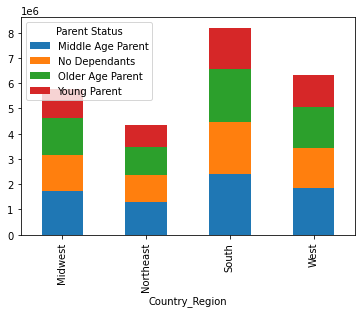

In [149]:
parent_region_stacked_bar = crosstab_parent_region.plot.bar(stacked= True)
plt.legend(title='Parent Status')

In [150]:
#Export chart

parent_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_parent_region.png'))

### Income Level by Region

In [151]:
crosstab_income_region = pd.crosstab(df['Country_Region'], df['Income Level'], dropna = False)
crosstab_income_region

Income Level,Higher Income,Lower Income,Middle Income
Country_Region,,,
Midwest,1721077,293682,3745010
Northeast,1286762,223280,2841771
South,2390338,436776,5370596
West,1845608,312749,4152882


In [152]:
crosstab_income_region.to_clipboard()

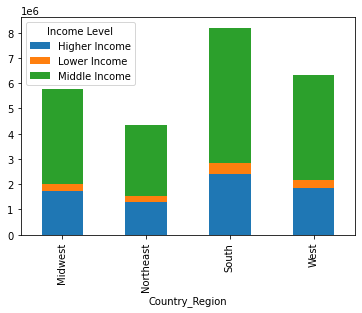

In [153]:
crosstab_income_region_stacked_bar = crosstab_income_region.plot.bar(stacked= True)
plt.legend(title='Income Level')

In [154]:
#Export chart

crosstab_income_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_income_region.png'))

### Pet Owner by Region

In [155]:
crosstab_pet_region = pd.crosstab(df['Country_Region'], df['Pet Owner'], dropna = False)
crosstab_pet_region

Pet Owner,Not Pet Owner,Pet Owner
Country_Region,,
Midwest,5119433,640336
Northeast,3893384,458429
South,7348454,849256
West,5614370,696869


In [156]:
crosstab_pet_region.to_clipboard()

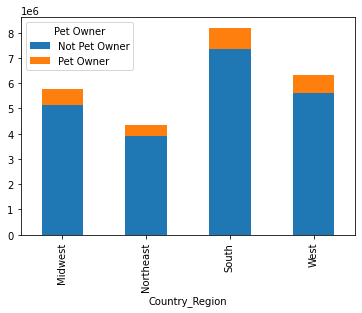

In [157]:
crosstab_pet_region_stacked_bar = crosstab_pet_region.plot.bar(stacked= True)
plt.legend(title='Pet Owner')

In [158]:
#Export chart

crosstab_pet_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_pet_region.png'))

## Visualizations by Department ID 

In [160]:
#Create crosstab of department_id & order_number columns to get total count of orders per department

crosstab_dept_orders = pd.crosstab(df['department_id'], df['order_number'], dropna = False)
crosstab_dept_orders

order_number,5,6,7,8,9,10,11,12,13,14,...,91,92,93,94,95,96,97,98,99,100
department_id,,,,,,,,,,,,,,,,,,,,,
1.0,121677,108726,96898,89136,80904,73614,66906,61387,57584,52845,...,815,737,788,753,713,695,654,644,589,0
2.0,1836,1620,1498,1327,1242,1094,1057,948,924,860,...,17,23,23,18,19,23,14,12,17,0
3.0,58866,53470,48383,44076,40824,37233,34455,32015,29498,27605,...,604,547,568,558,528,504,496,422,521,0
4.0,461003,417515,380822,348286,322424,297257,275114,253502,238128,221036,...,5603,5383,5138,5036,4919,4572,4474,4419,4051,0
5.0,8391,7573,6712,6028,5339,4754,4346,3957,3648,3402,...,64,50,85,56,65,65,81,46,76,0
6.0,14042,12566,11287,10345,9436,8508,7973,7058,6525,6173,...,142,129,112,128,116,111,108,94,98,0
7.0,135138,123059,110851,101743,93818,86228,79360,73970,68669,64253,...,1439,1418,1371,1316,1242,1160,1142,1116,1167,0
8.0,5341,4899,4307,4006,3578,3196,3029,2803,2610,2328,...,30,36,32,16,24,33,38,20,18,0
9.0,46169,41408,37312,33500,30188,27914,25909,23604,21928,20082,...,385,355,343,346,315,305,286,241,219,0


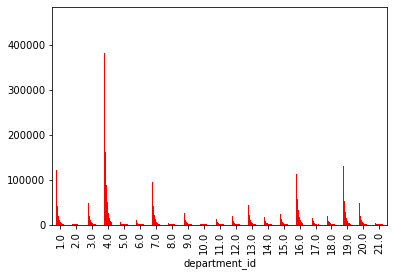

In [161]:
#Create bar  chart of department id by total orders

bar_department_orders = crosstab_dept_orders.plot.bar(color=['red'])
bar_department_orders.get_legend().remove()

## Ordering Habits by Region & Status

In [163]:
#View stats on order_hour_of_day grouped by region

df.groupby('Country_Region').agg({'order_hour_of_day':['mean','median']})

order_hour_of_day       
                            mean median
Country_Region                         
Midwest                13.383653     13
Northeast              13.363536     13
South                  13.352210     13
West                   13.360734     13

In [164]:
#View stats on order_day_of_week grouped by region

df.groupby('Country_Region').agg({'order_dow':['mean','median']})

order_dow       
                    mean median
Country_Region                 
Midwest         2.747520      3
Northeast       2.741176      3
South           2.751821      3
West            2.748574      3

In [165]:
#Sum prices paid & group by Parent Status

parent_status_prices = df.groupby('Parent_Status').agg({'prices':['sum']})

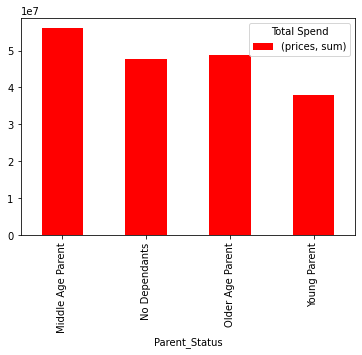

In [166]:
bar_parent_status_prices = parent_status_prices.plot.bar(color=['red'])
plt.legend(title='Total Spend')